In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 20 18:46:18 2019

@author: silviu
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


listings = pd.read_csv('./data/listings.csv', low_memory=False)

#print(listings.columns.values)

df = listings[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "weekly_price", "monthly_price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

#print(df.head())

# % of NaN values
print((len(df)-df.count())/len(df)*100)


host_response_rate       26.711919
host_acceptance_rate    100.000000
host_is_superhost         0.019964
host_listings_count       0.019964
zipcode                   1.921541
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
bathrooms                 0.069874
bedrooms                  0.054901
beds                      0.124775
price                     0.000000
weekly_price             88.840088
monthly_price            90.462168
number_of_reviews         0.000000
review_scores_rating     21.196846
cancellation_policy       0.000000
reviews_per_month        19.849271
dtype: float64


In [2]:
df = listings[["host_is_superhost", 
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price",  "number_of_reviews",  "cancellation_policy", 
               ]]

print(df.head())


  host_is_superhost  host_listings_count  zipcode property_type  \
0                 f                  1.0      M6J         House   
1                 f                  2.0      M5J     Apartment   
2                 f                  1.0      M6G         House   
3                 t                  2.0  M6E 2P3         House   
4                 f                  7.0  M5V 3P5   Condominium   

         room_type  accommodates  bathrooms  bedrooms  beds    price  \
0  Entire home/apt            10        3.0       5.0   7.0  $469.00   
1     Private room             2        1.5       1.0   1.0  $100.00   
2     Private room             1        1.5       1.0   1.0   $67.00   
3     Private room             2        1.0       1.0   1.0   $70.00   
4  Entire home/apt             5        1.0       1.0   2.0  $200.00   

   number_of_reviews          cancellation_policy  
0                  7  strict_14_with_grace_period  
1                169  strict_14_with_grace_period  
2       

In [3]:
# % of NaN values
print((len(df)-df.count())/len(df)*100)

host_is_superhost      0.019964
host_listings_count    0.019964
zipcode                1.921541
property_type          0.000000
room_type              0.000000
accommodates           0.000000
bathrooms              0.069874
bedrooms               0.054901
beds                   0.124775
price                  0.000000
number_of_reviews      0.000000
cancellation_policy    0.000000
dtype: float64


In [4]:
# drop NaN rows
df2=df.dropna(axis=0)

# % of rows droppped
print('Dropped ', (len(df)-len(df2))/len(df)*100)


Dropped  2.1311639049710522


In [5]:
print(df2.columns.values)

['host_is_superhost' 'host_listings_count' 'zipcode' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'price'
 'number_of_reviews' 'cancellation_policy']


In [6]:
df2['price'] = df2['price'].str.replace("[$, ]", "").astype("float")

df2['superhost']=np.where(df2['host_is_superhost']=='t',1,0)
del df2['host_is_superhost']

non_num_vars = df2.select_dtypes(include=['object']).columns
#print('non num ', non_num_vars)
print(df2[non_num_vars].head())

   zipcode property_type        room_type          cancellation_policy
0      M6J         House  Entire home/apt  strict_14_with_grace_period
1      M5J     Apartment     Private room  strict_14_with_grace_period
2      M6G         House     Private room                     moderate
3  M6E 2P3         House     Private room  strict_14_with_grace_period
4  M5V 3P5   Condominium  Entire home/apt  strict_14_with_grace_period


/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/silviu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
dummy_vars = pd.get_dummies(df2[non_num_vars])

print(dummy_vars.head())


   zipcode_2v5  zipcode_L0J  zipcode_L0K 1B0  zipcode_L3R 3G4  \
0            0            0                0                0   
1            0            0                0                0   
2            0            0                0                0   
3            0            0                0                0   
4            0            0                0                0   

   zipcode_L3S 1T4  zipcode_L3T  zipcode_L3T 0C7  zipcode_L3T 1A2  \
0                0            0                0                0   
1                0            0                0                0   
2                0            0                0                0   
3                0            0                0                0   
4                0            0                0                0   

   zipcode_L3T 1A4  zipcode_L3T 1J3                 ...                   \
0                0                0                 ...                    
1                0                0       

In [8]:
# drop non-numeric variables from df2 and add the dummies
df3=df2.drop(non_num_vars,axis=1)
df3 = pd.merge(df3,dummy_vars, left_index=True, right_index=True)
df3.head()


,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,superhost,zipcode_2v5,zipcode_L0J,...,property_type_Treehouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1.0,10,3.0,5.0,7.0,469.0,7,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2.0,2,1.5,1.0,1.0,100.0,169,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1.0,1,1.5,1.0,1.0,67.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,2.0,2,1.0,1.0,1.0,70.0,207,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,7.0,5,1.0,1.0,2.0,200.0,36,0,0,0,...,0,0,1,0,0,0,0,1,0,0


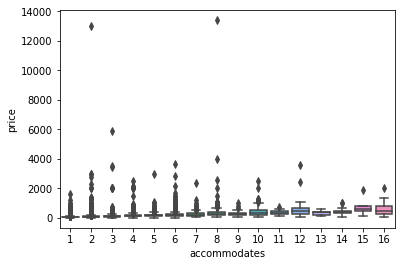

In [9]:
sns.boxplot(x='accommodates', y='price', data=df3)

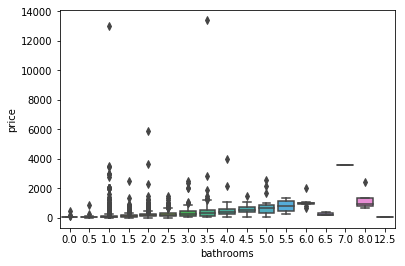

In [10]:
sns.boxplot(x='bathrooms', y='price', data=df3)

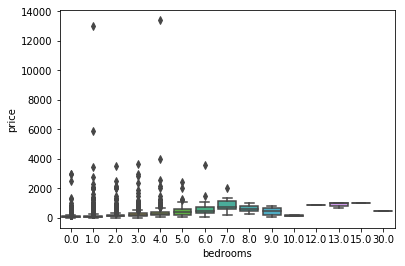

In [11]:
sns.boxplot(x='bedrooms', y='price', data=df3)

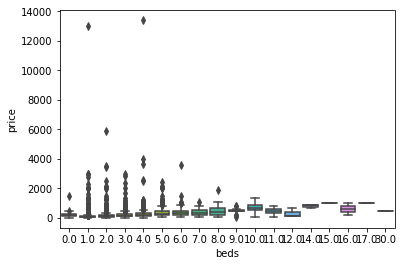

In [12]:
sns.boxplot(x='beds', y='price', data=df3)